In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.建立Graph

如下图所示建立一个图。
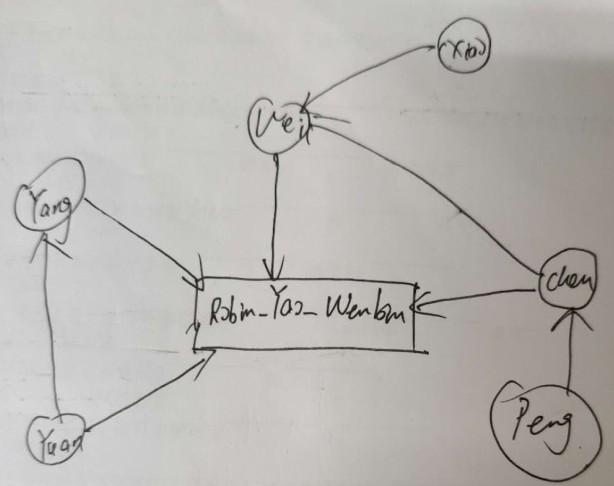

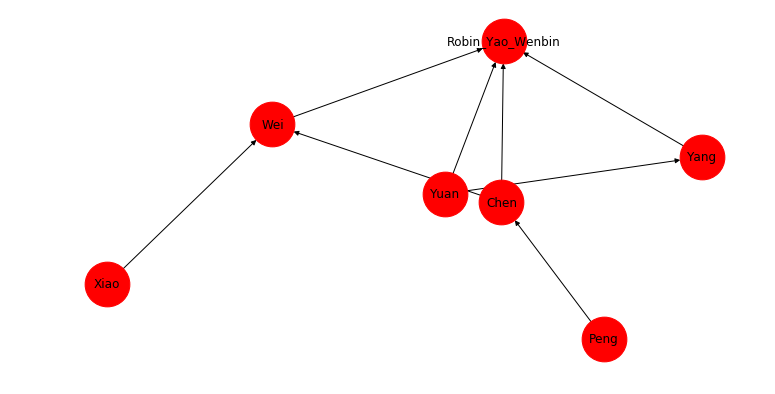

In [15]:
plt.figure(figsize=(10,5))

G = nx.DiGraph()
G.add_nodes_from(['Robin_Yao_Wenbin','Wei','Yang','Yuan','Xiao','Chen','Peng'])    #加点集合
G.add_edge('Wei' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Yang' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Yuan' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Chen' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Peng' ,'Chen' )   #一次添加一条边
G.add_edge('Xiao' ,'Wei' )   #一次添加一条边
G.add_edge('Chen' ,'Wei' )   #一次添加一条边
G.add_edge('Yuan' ,'Yang' )   #一次添加一条边
nx.draw(G, with_labels=True , node_size = 2000)
plt.show()

## 2.计算Pagerank

**PR=alpha*(A * PR+dangling分配)+(1-alpha) * 平均分配**

**也就是三部分，A*PR其实是我们用图矩阵分配的，dangling分配则是对dangling node的PR值进行分配，(1-alpha)分配则是天下为公大家一人一份分配的**

**dangling node 也就是悬空结点，它的出度为0，也就是无法从它到任何其他结点，解决办法是增加一定的随机性，dangling分配其实就是加上一个随机向量，也就是无法从这个结点去往任何其他结点，但是可能会随机重新去一个结点，也可以这么理解，到了一个网站，这个网站不连接到任何网站，但是浏览者可能重新随机打开一个页面。**

**其实通俗的来说，我们可以将PageRank看成抢夺大赛，有三种抢夺机制。**

**1，A*PR这种是自由分配，大家都愿意参与竞争交流的分配**

**2，dangling是强制分配，有点类似打倒土豪分田地的感觉，你不参与自由市场，那好，我们就特地帮你强制分。**

**3，平均分配，其实就是有个机会大家实现共产主义了，不让spider trap这种产生rank sink的节点捞太多油水，其实客观上也是在帮dangling分配。**
 
**从图和矩阵的角度来说，可以这样理解，我们这个矩阵可以看出是个有向图**

**矩阵要收敛-->矩阵有唯一解-->n阶方阵对应有向图是强连通的-->两个节点相互可达，1能到2,2能到1**

**如果是个强连通图，就是我们上面说的第1种情况，自由竞争，那么我们可以确定是收敛的**

**不然就会有spider trap造成rank sink问题**


具体可见下述链接：
https://blog.csdn.net/a_31415926/article/details/40510175

In [16]:
pr = nx.pagerank(G, alpha=0.85, personalization=None,
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
             dangling=None)

In [17]:
pr

{'Chen': 0.1269340607365247,
 'Peng': 0.06861265036356039,
 'Robin_Yao_Wenbin': 0.38857412754295295,
 'Wei': 0.18088050507979847,
 'Xiao': 0.06861265036356039,
 'Yang': 0.09777335555004255,
 'Yuan': 0.06861265036356039}

## 3.检验理解的正确性

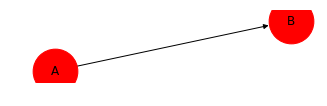

{'A': 0.35087736193586194, 'B': 0.649122638064138}

In [31]:
plt.figure(figsize=(4,1))

G2 = nx.DiGraph()
G2.add_nodes_from(['A','B'])    #加点集合
G2.add_edge('A' ,'B' )   #一次添加一条边
# G2.add_edge('B' ,'A' )   #一次添加一条边
nx.draw(G2, with_labels=True , node_size = 2000)
plt.show()
pr = nx.pagerank(G2, alpha=0.85, personalization=None,
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
             dangling=None)
pr

成功验证上述的说法是准确无误的，网上大多数的pagerank说明都是和networkx的pagerank的实现不一样的。

验证方法：

将上述算法计算得到的PR(A)和PR(B)代入到PR(A)和PR(B)的计算公式中，观察结果是否稳定，即达到达到pagerank的收敛条件。

PR(A)=0.15/2+0.85 * 0.5 * 0.649123=0.350877

PR(B)=0.350877+0.85 * 0.35087=0.649123
得证。